# **環境設定**

In [ ]:
# https://app.roboflow.com/lab-niabe/tooth_data_v1_0308_gray_ahe_01/3

In [ ]:
#確認路徑
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
#安裝套件與引用yolo
!pip install ultralytics

from IPython import display
display.clear_output()
from IPython.display import display, Image

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [ ]:
#建立資料集路徑，記得替換{HOME}
HOME= '/content'
!mkdir {HOME}/datasets
%cd {HOME}/datasets

#下載roboflow套件並引入自定義圖片(查看說明文件第一點)
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("lab-niabe").project("tooth_data_v1_0308_gray_ahe_01")
version = project.version(3)
dataset = version.download("yolov8-obb")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


# **訓練自定義模型**
查看說明文件第二點更改設定(data.yaml)

In [ ]:
# mode=train
%cd {HOME}

!yolo task=obb mode=train model=yolov8s-obb.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 batch=8

/content
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8s-obb.pt, data=/content/datasets/tooth_data_v1_0308_GRAY_AHE_01-3/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

/content


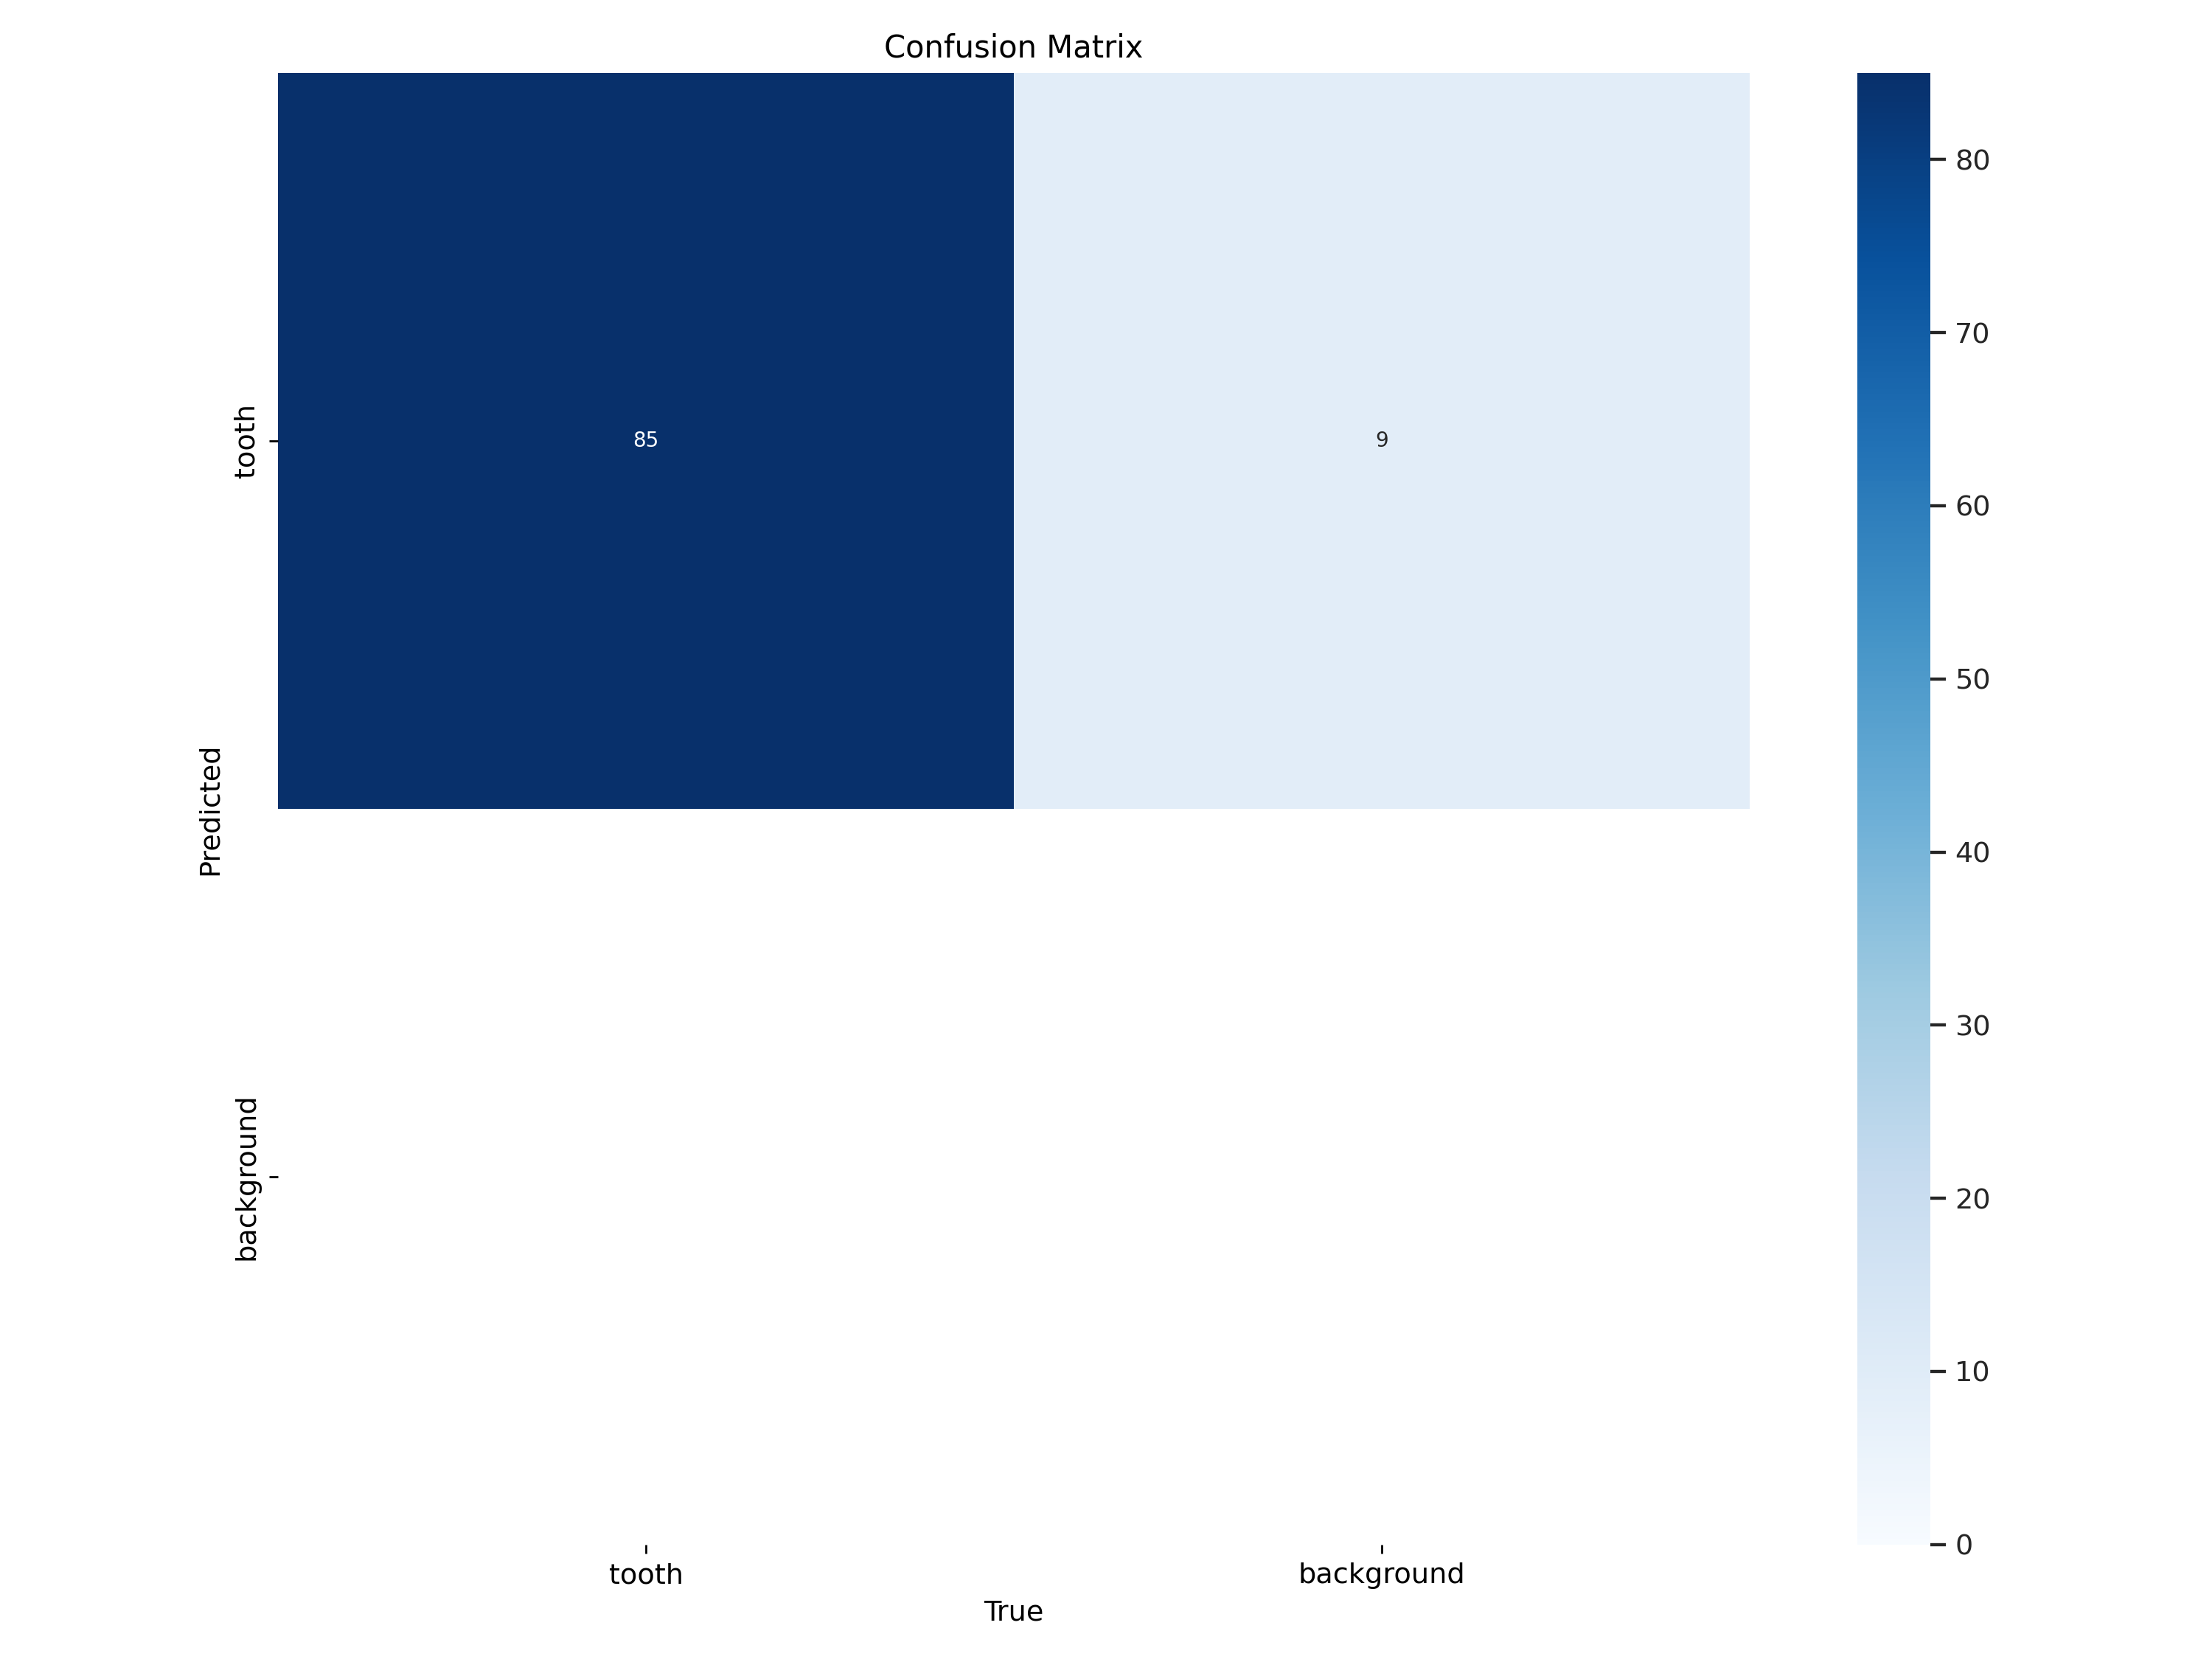

In [ ]:
from PIL import Image
# 查看訓練結果，記得注意路徑

%cd {HOME}
# Image(filename=f'{HOME}/runs/obb/train/confusion_matrix.png', width=600)
Image.open(f'{HOME}/runs/obb/train3/confusion_matrix.png')





/content


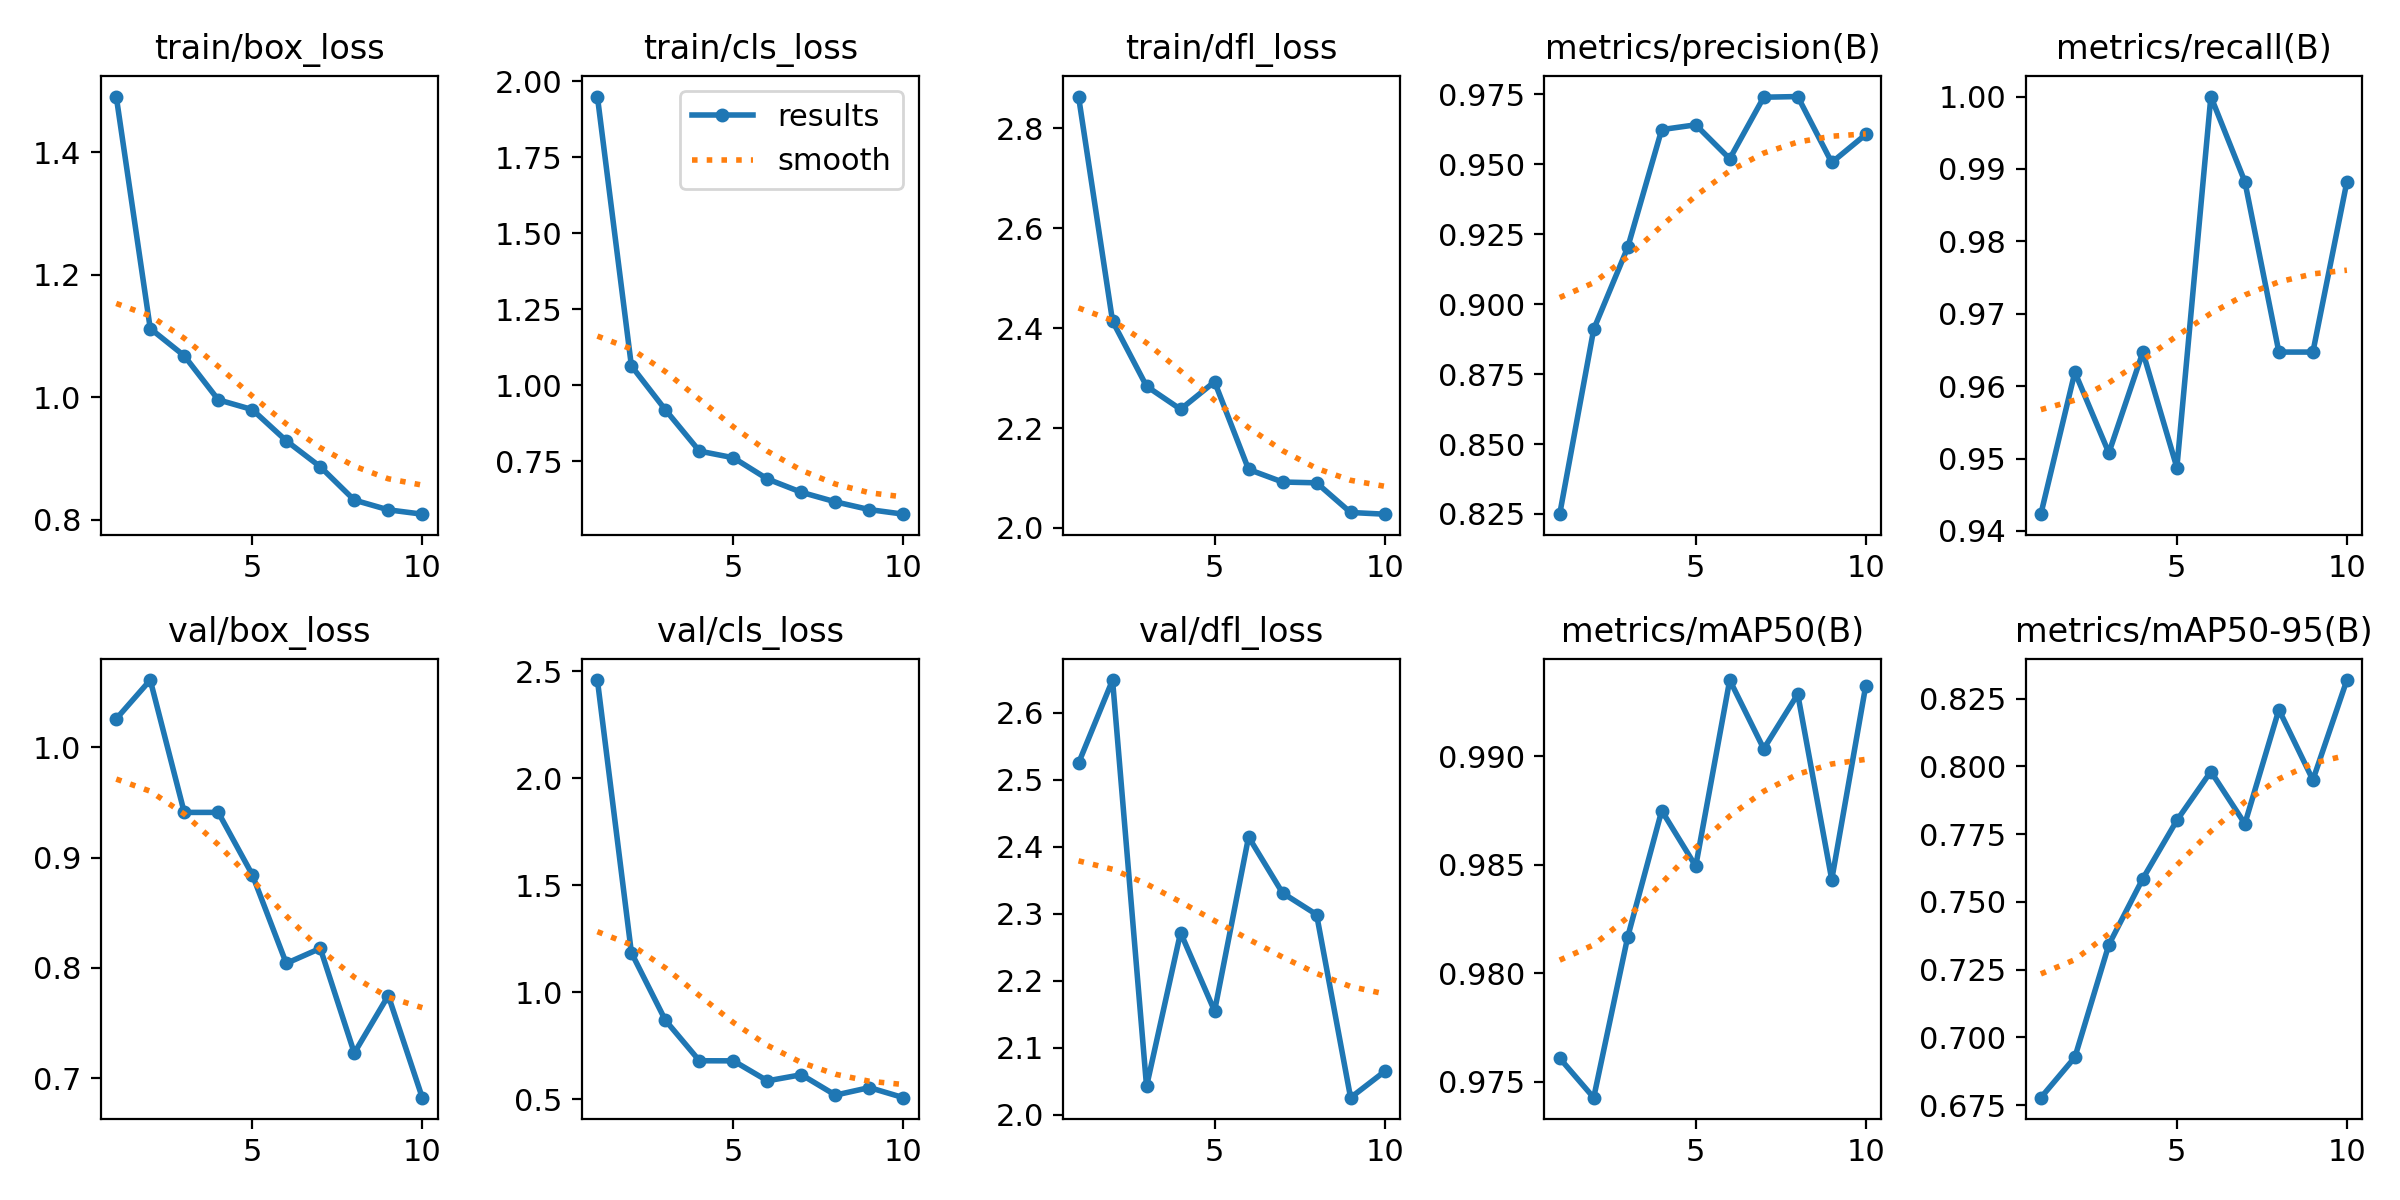

In [ ]:
# 查看訓練結果，記得注意路徑

%cd {HOME}
Image.open(f'{HOME}/runs/obb/train3/results.png')

In [ ]:
# mode=val，記得注意路徑
%cd {HOME}

!yolo task=obb mode=val model={HOME}/runs/obb/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-obb summary (fused): 187 layers, 11411958 parameters, 0 gradients, 29.4 GFLOPs
val: Scanning /content/datasets/tooth_data_v1_0308_GRAY_AHE_01-3/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.18it/s]
                   all         29         85      0.961      0.988      0.993      0.832
Speed: 7.0ms preprocess, 14.3ms inference, 0.0ms loss, 10.7ms postprocess per image
Results saved to runs/obb/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# mode=predict，記得注意路徑
%cd {HOME}
!yolo task=obb mode=predict model={HOME}/runs/obb/train3/weights/best.pt conf=0.5 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-obb summary (fused): 187 layers, 11411958 parameters, 0 gradients, 29.4 GFLOPs

image 1/15 /content/datasets/tooth_data_v1_0308_GRAY_AHE_01-3/test/images/120_jpg.rf.2a59d633898332b0684e8f843b3e4958.jpg: 640x640 17.3ms
image 2/15 /content/datasets/tooth_data_v1_0308_GRAY_AHE_01-3/test/images/121_jpg.rf.6fafa1195f07dd50b3a5741e7874594c.jpg: 640x640 17.3ms
image 3/15 /content/datasets/tooth_data_v1_0308_GRAY_AHE_01-3/test/images/141_jpg.rf.0cea70673f9d72539d14b828b4274628.jpg: 640x640 17.2ms
image 4/15 /content/datasets/tooth_data_v1_0308_GRAY_AHE_01-3/test/images/142_jpg.rf.b38b6231fde45b807a9a581d45da9d76.jpg: 640x640 17.2ms
image 5/15 /content/datasets/tooth_data_v1_0308_GRAY_AHE_01-3/test/images/145_jpg.rf.71a502d2544c11f8ef1afc0c3a15b174.jpg: 640x640 17.3ms
image 6/15 /content/datasets/tooth_data_v1_0308_GRAY_AHE_01-3/test/images/148_jpg.rf.27ad2976997fb503fb9956ffd9f63d05.jpg: 640

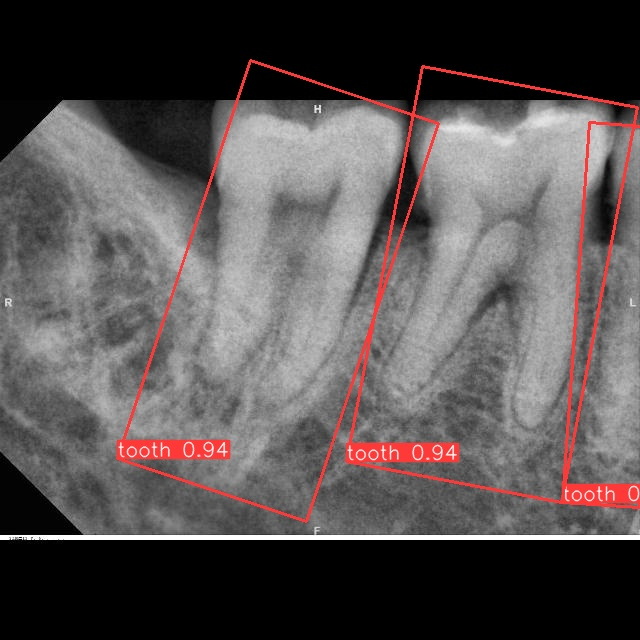

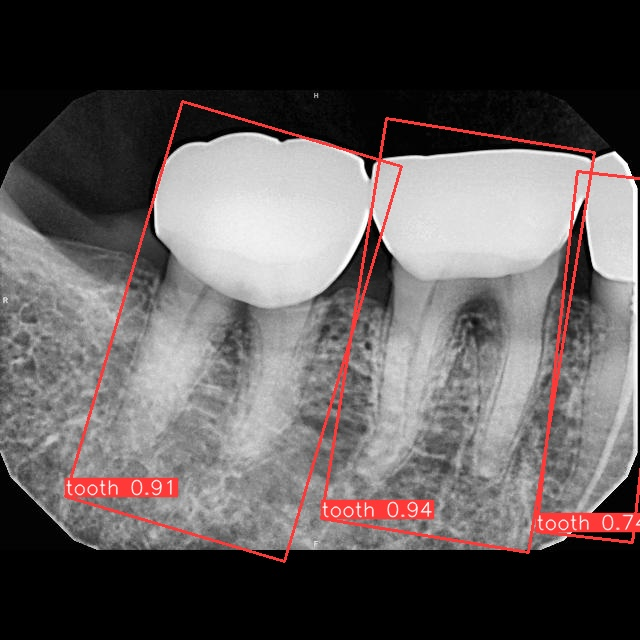

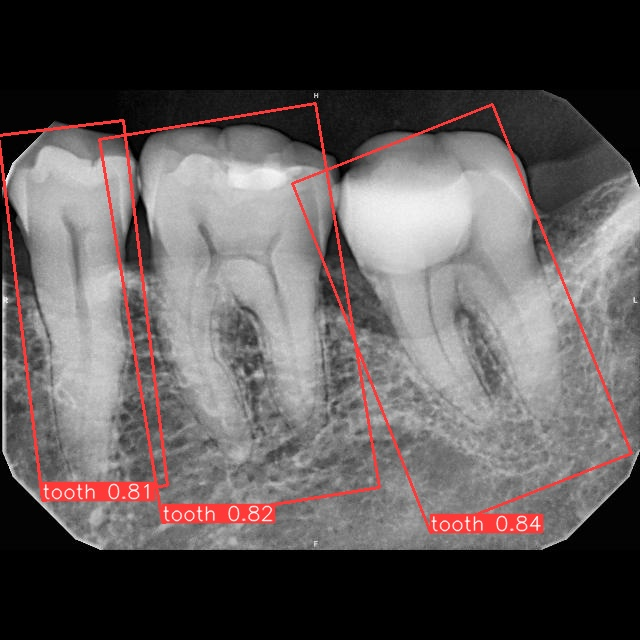

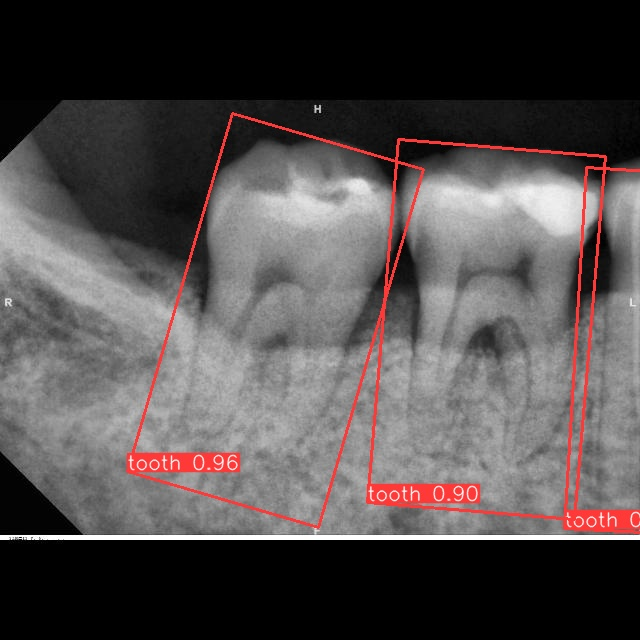

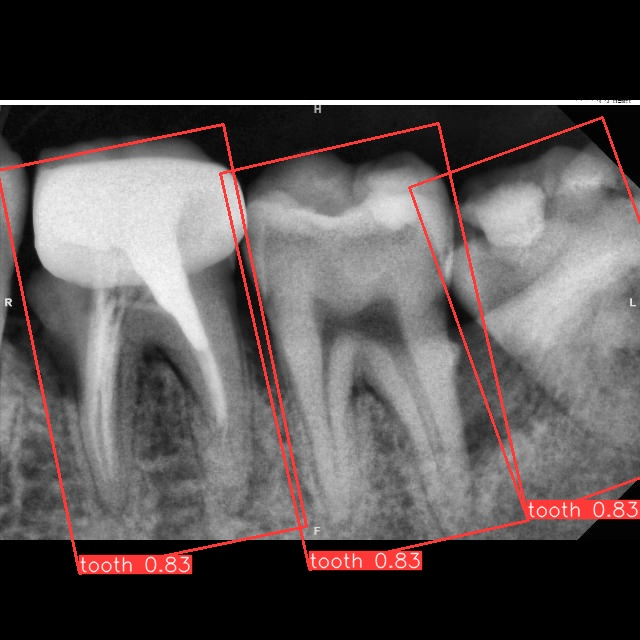

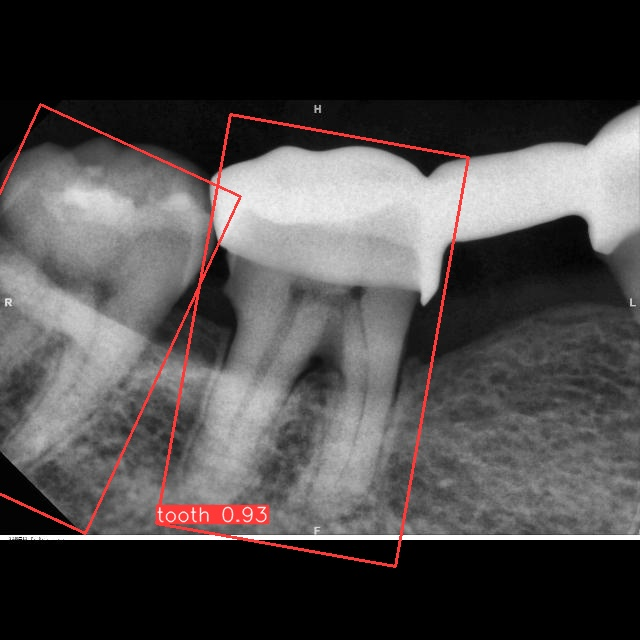

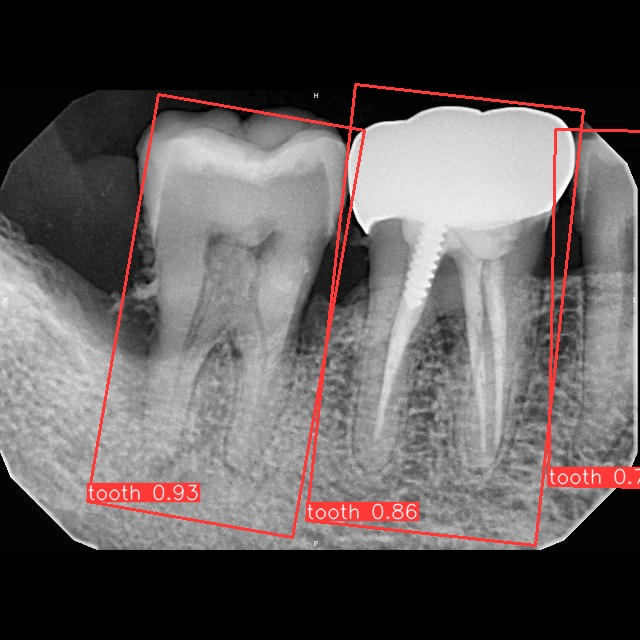

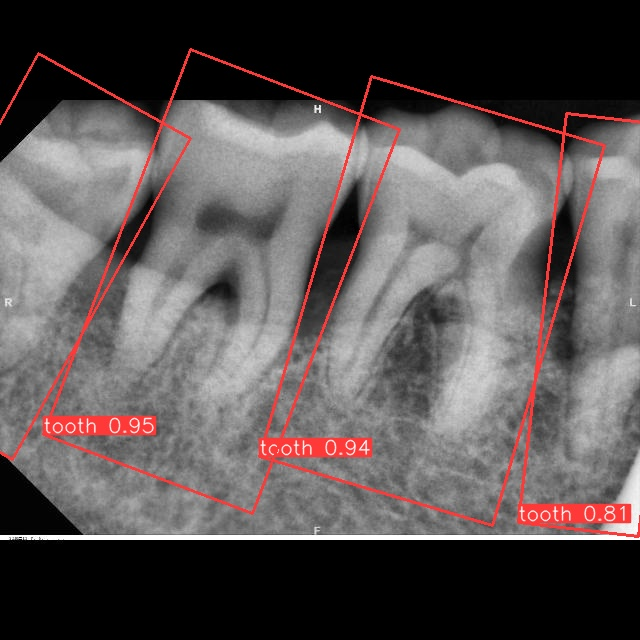

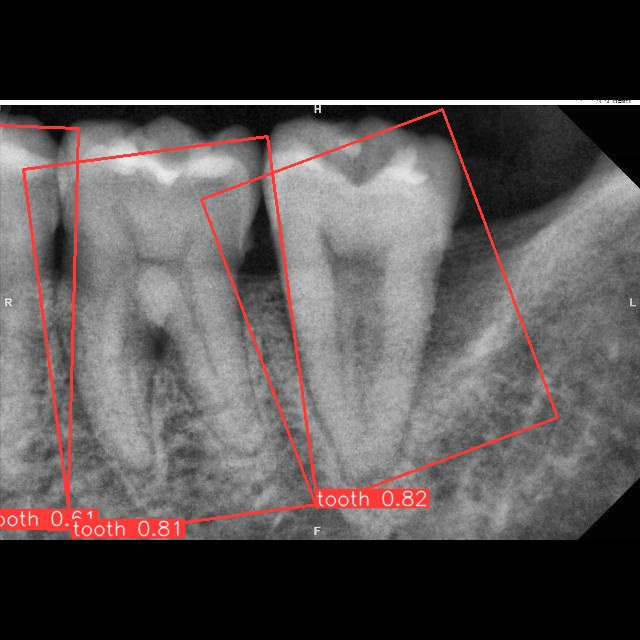

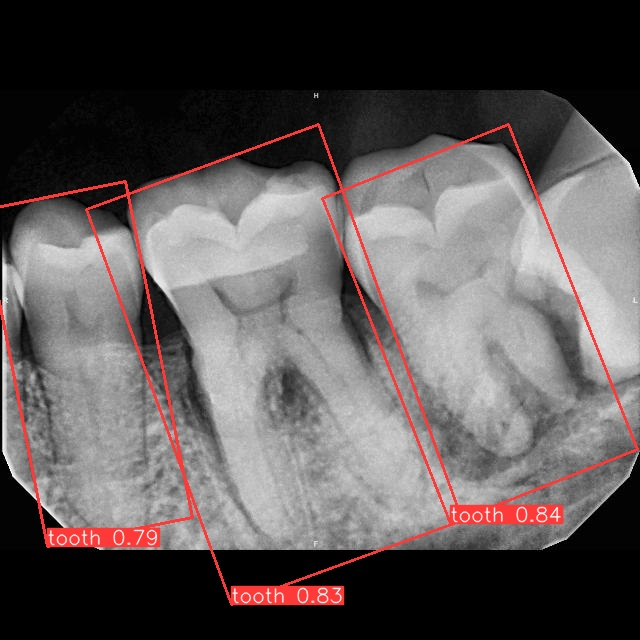

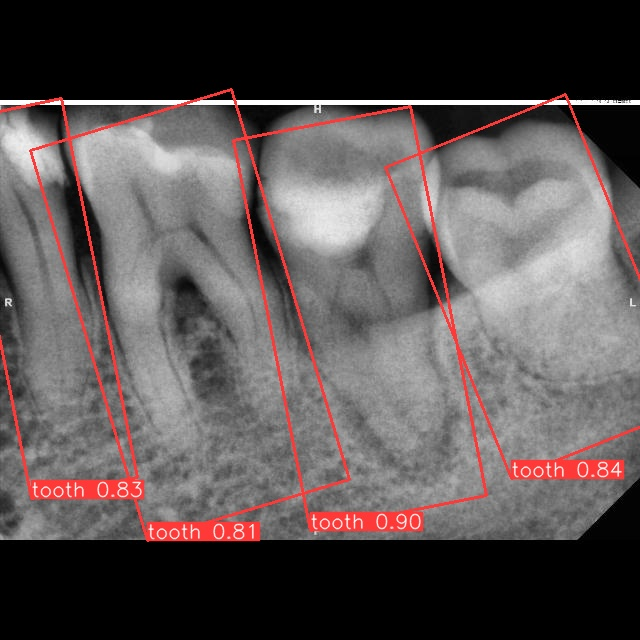

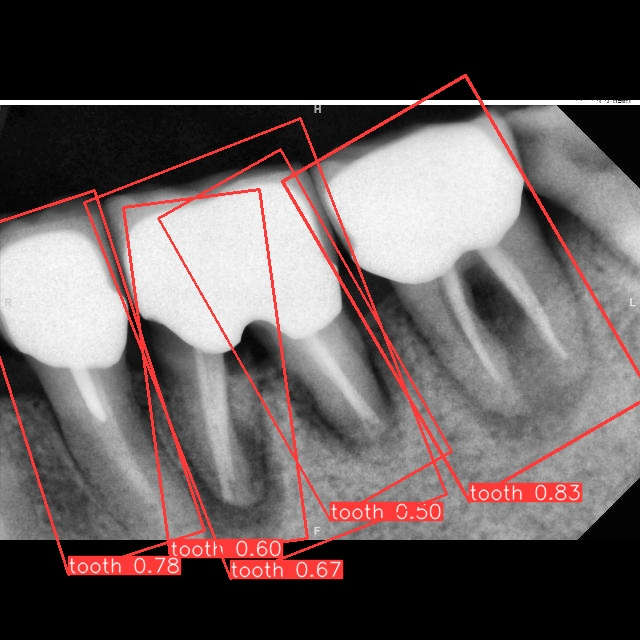

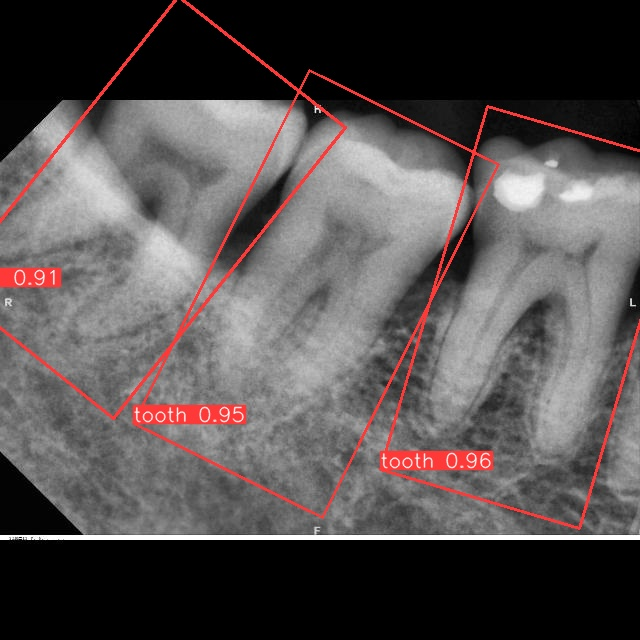

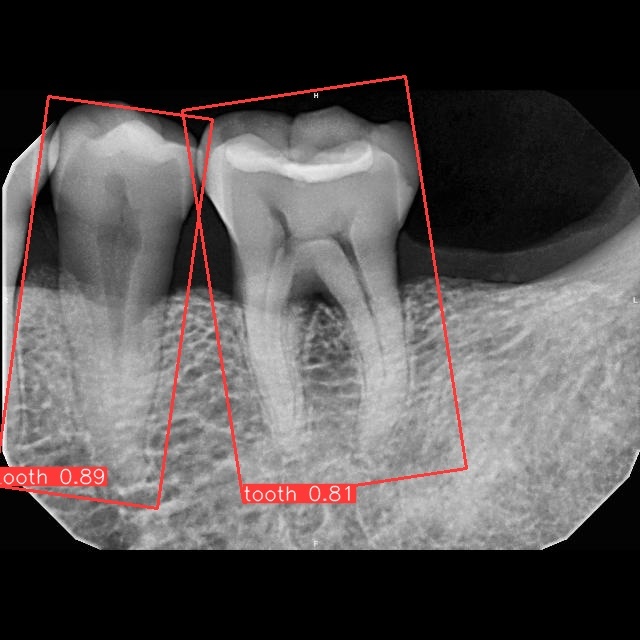

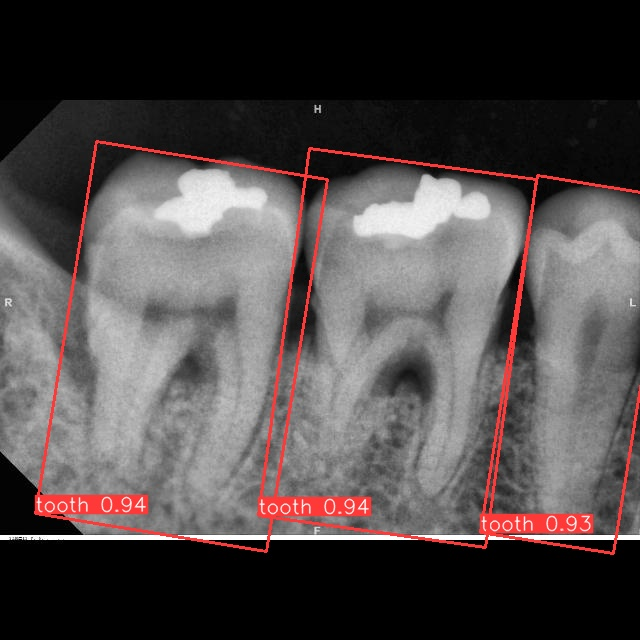

In [ ]:
# 將測試結果一張張輸出給我們看
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/obb/predict/*.jpg'):
      display(Image(filename=image_path))
      print("\n")

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
# model = YOLO(f'{HOME}/runs/obb/yolov8s-obb.pt')
# model = YOLO(f'{HOME}/runs/obb/yolov8n.pt')
model = YOLO(f'{HOME}/runs/obb/train3/weights/best.pt')


# Run inference on an image
results = model(f'{dataset.location}/test/images/120_jpg.rf.2a59d633898332b0684e8f843b3e4958.jpg')  # results list


# View results
for r in results:
    #display(Image(filename=image_path))
    #print("\n")
    #print(r.boxes)  # print the Boxes object containing the detection bounding boxes
    #print(r.path)
    print(r.obb)
    print("\n")
    print(r.names)


image 1/1 /content/datasets/tooth_data_v1_0308_GRAY_AHE_01-3/test/images/120_jpg.rf.2a59d633898332b0684e8f843b3e4958.jpg: 640x640 17.3ms
Speed: 2.9ms preprocess, 17.3ms inference, 215.9ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.OBB object with attributes:

cls: tensor([0., 0., 0.], device='cuda:0')
conf: tensor([0.8216, 0.8086, 0.6059], device='cuda:0')
data: tensor([[379.5828, 308.5238, 328.8129, 256.9077,   1.2142,   0.8216,   0.0000],
        [170.4563, 336.8368, 371.4635, 246.8158,   1.4370,   0.8086,   0.0000],
        [ 31.3274, 327.6044, 401.3152,  82.9711,   1.5978,   0.6059,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([3, 7])
xywhr: tensor([[379.5828, 308.5238, 328.8129, 256.9077,   1.2142],
        [170.4563, 336.8368, 371.4635, 246.8158,   1.4370],
        [ 31.3274, 327.6044, 401.3152,  82.9711,   1.5978]], device='cuda:0')
xyxy: tensor([[201.8173, 109.6183, 557.3483, 507.4294],
        [

# **額外功能**

In [ ]:
#這格選用 他是為了把之前的yolov5 OBB 轉 yolov8 OBB，現在roboflow已經有相關的匯出支援(若我們更改使用工具可能會用到)
import os

# Define the classes and their corresponding indices
class_names = ['0: apical_lesion']
class_indices = {name: index for index, name in enumerate(class_names)}


# Image dimensions
img_width, img_height = 640, 640

# Path to the folder containing the annotation files
folder_path = '/content/datasets/test_1112_01_apical-lesion_multi-1/valid/labels'
#folder_path = '/content/datasets/test_1112_01_apical-lesion_multi-1/train/labels'
#folder_path = '/content/datasets/test_1112_01_apical-lesion_multi-1/tst/labels'


# Function to normalize coordinates
def normalize_coordinates(coord, max_value):
    return float(coord) / max_value

# Process each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # assuming the annotation files are .txt files
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            lines = file.readlines()


        new_lines = []
        for line in lines:
            parts = line.strip().split(' ')
            if len(parts) == 10:
                # Extract label and coordinates
                label = parts[-2]
                coords = parts[:8]

                # Get the class index
                class_index = class_indices.get(label, -1)
                if class_index != -1:
                    # Normalize coordinates
                    normalized_coords = [normalize_coordinates(coords[i], img_width if i % 2 == 0 else img_height) for i in range(8)]

                    # Convert to the desired format and add to new lines
                    new_line = f"{class_index} " + " ".join(map(str, normalized_coords))
                    new_lines.append(new_line)

        # Write the converted lines to a new file or overwrite the existing file
        with open(file_path, 'w') as file:
            file.write('\n'.join(new_lines))